## FoM_ParallaxHADegen ##

**2016-05-02** -- Evaluate astrometry Figure of Merit based on the "ParallaxHADegenMetric" in sims_maf. 

Report the fraction of fields for which the correlation $|r| >$ 0.7 (or other chosen level). **Smaller values are better.**

There is some syntax here that constructs the file path for the input metric from user-given choices. This might not work on your setup (depending on where you put the .npz metric outputs). You can just set variable **inPath** directly to load a specific metric evaluation.

### Import modules ###

In [229]:
import numpy as np
import os

In [230]:
# the metric bundle has plot methods
import lsst.sims.maf.metricBundles as mb

In [231]:
# Can live without this entirely if not plotting
%matplotlib inline
import matplotlib.cm as cm

### Set parameters, OpSim run choice, and toplevel directory ###

In [232]:
# What level do we want?
rMaxGood = 0.70
rUnacc = 0.90

In [233]:
metricEvalDir = '/Users/clarkson/Data/LSST/OpSimRuns/opsim20160411/metricEvals'

In [234]:
# Select the choice of OpSim run we're loading
sOpSim = 'minion_1016'
#sOpSim = 'minion_1020'
#sOpSim = 'astro_lsst_01_1004'

In [235]:
# number of nights
#nNight = 10000
#nNight = 730
nNight = 365

In [236]:
# what quantity are we summing...
sMetric = 'ParallaxHADegenMetric'

### Load the evaluated metric bundle ###

In [237]:
# some strings to build up the run and directory

sFiltDir = 'ugrizy'
sFiltFil = ''

#sFiltDir = 'y'
#sFiltFil = 'y_and_'

sSQL = 'night_lt_%i' % (nNight)
sSelDir = 'nside64_%s_n%i_r21p0_lims' % (sFiltDir, nNight)

In [238]:
inputDir='%s/%s_%s' % (metricEvalDir, sOpSim, sSelDir)
inputFil='%s_%s_%s%s_HEAL.npz' % (sOpSim, sMetric, sFiltFil, sSQL)
inPath = '%s/%s' % (inputDir, inputFil)

In [239]:
if not os.access(inPath, os.R_OK):
    print "WARNING - cannot read inPath %s" % (inPath)

In [240]:
myBundle = mb.createEmptyMetricBundle()
myBundle.read(inPath)
print myBundle.metric.name

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
ParallaxHADegenMetric


### Compute and report the FoM ###

In [241]:
# Select on the value
vals = myBundle.metricValues
bAll = np.isfinite(vals)

# Do this piece by piece
bGood = (np.abs(vals) < rMaxGood)
bBad = (np.abs(vals) < rUnacc) & (~bGood)
bUnacc = (np.abs(vals) >= rUnacc)

nAll = np.sum(bAll)
nGood = np.sum(bGood)
nBad = np.sum(bBad)
nUnacc = np.sum(bUnacc)

In [242]:
# Sanity check on the logic
# print nUnacc + nBad + nGood
# print nAll

In [243]:
FoM = ((nBad + nUnacc) / np.float(nAll))
print "FoM for %s:" % (inputFil)
print "--- %.3f" % (FoM)

print "FoM (nBad or nUnacc)/nTotal = %i/%i" % (nBad+nUnacc, nAll)


FoM for minion_1016_ParallaxHADegenMetric_night_lt_365_HEAL.npz:
--- 0.015
FoM (nBad or nUnacc)/nTotal = 457/31116


## Sanity check - plots ##

In [244]:
# print minmax values
print "Metric values: Min %.3f, Max %.3f" \
    % (np.min(myBundle.metricValues), np.max(myBundle.metricValues))

Metric values: Min -0.932, Max 0.763


In [245]:
cMap = cm.get_cmap('gnuplot2_r')
cMap = cm.get_cmap('cubehelix_r')

In [246]:
# set plot parameters
thisPlotDict = {'logScale':False, 'cmap':cMap}# cm.RdBu_r}

thisPlotDict['colorMin'] = 0. - rMaxGood
thisPlotDict['colorMax'] = 0. + rMaxGood

monopole: 0.13043  dipole: lon: -14.0258, lat: 21.8484, amp: 0.131792


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

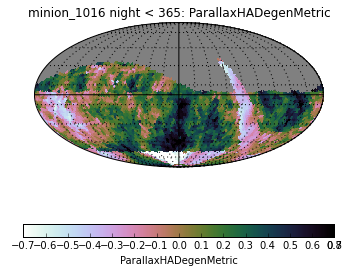

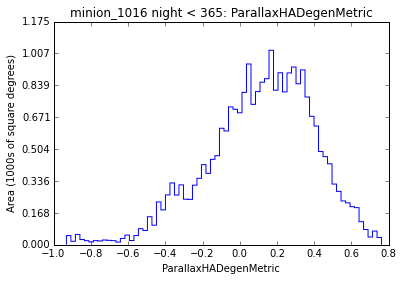

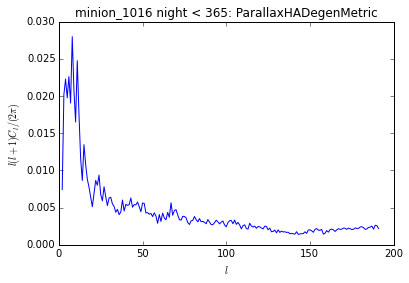

In [247]:
myBundle.setPlotDict(thisPlotDict)
myBundle.plot(savefig=True)